In [0]:
#@title mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#@title cd to project3 folder
%cd 'drive/My Drive/Colab Notebooks/project3'

/content/drive/My Drive/Colab Notebooks/project3


In [0]:
#@title pytorch version run test
# import torch
# !python test.py --input_dir "../sample" --output_dir "../sample_out" --style Hosoda --gpu 0

In [0]:
#@title imports 
import argparse
import cv2
import gc
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.layers import Reshape, Input, Conv2D, Conv2DTranspose, MaxPooling2D, Dense, BatchNormalization, ReLU, Add, LeakyReLU
from keras.models import Sequential, load_model
from keras.optimizers import Adam
from keras.losses import binary_crossentropy

from keras import Model

from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras import backend as K

Using TensorFlow backend.


In [0]:
#@title def make_generator

def make_generator():
  in_ = Input(shape=(256, 256, 3))
  conv1 = Conv2D(64, 7, padding="same")(in_)
  norm1 = BatchNormalization(epsilon=1e-9)(conv1)
  relu1 = ReLU()(norm1)

  # Down-convolution
  conv2 = Conv2D(128, 3, padding="same", strides=(2, 2))(relu1)
  conv3 = Conv2D(128, 3, padding="same")(conv2)
  norm2 = BatchNormalization(epsilon=1e-9)(conv3)
  relu2 = ReLU()(norm2)

  conv4 = Conv2D(256, 3, padding="same", strides=(2, 2))(relu2)
  conv5 = Conv2D(256, 3, padding="same")(conv4)
  norm3 = BatchNormalization(epsilon=1e-9)(conv5)
  relu3 = ReLU()(norm3)

  # 8 residual blocks
  # block_1
  res_conv1_1 = Conv2D(256, 3, padding="same")(relu3)
  res_norm_1 = BatchNormalization(epsilon=1e-9)(res_conv1_1)
  res_relu_1 = ReLU()(res_norm_1)
  res_conv2_1 = Conv2D(256, 3, padding="same")(res_relu_1)
  res_norm2_1 = BatchNormalization(epsilon=1e-9)(res_conv2_1)
  res_add_1 = Add()([relu3, res_norm2_1])

  # block_2
  res_conv1_2 = Conv2D(256, 3, padding="same")(res_add_1)
  res_norm_2 = BatchNormalization(epsilon=1e-9)(res_conv1_2)
  res_relu_2 = ReLU()(res_norm_2)
  res_conv2_2 = Conv2D(256, 3, padding="same")(res_relu_2)
  res_norm2_2 = BatchNormalization(epsilon=1e-9)(res_conv2_2)
  res_add_2 = Add()([relu3, res_norm2_2])

  # block_3
  res_conv1_3 = Conv2D(256, 3, padding="same")(res_add_2)
  res_norm_3 = BatchNormalization(epsilon=1e-9)(res_conv1_3)
  res_relu_3 = ReLU()(res_norm_3)
  res_conv2_3 = Conv2D(256, 3, padding="same")(res_relu_3)
  res_norm2_3 = BatchNormalization(epsilon=1e-9)(res_conv2_3)
  res_add_3 = Add()([relu3, res_norm2_3])

  # block_4
  res_conv1_4 = Conv2D(256, 3, padding="same")(res_add_3)
  res_norm_4 = BatchNormalization(epsilon=1e-9)(res_conv1_4)
  res_relu_4 = ReLU()(res_norm_4)
  res_conv2_4 = Conv2D(256, 3, padding="same")(res_relu_4)
  res_norm2_4 = BatchNormalization(epsilon=1e-9)(res_conv2_4)
  res_add_4 = Add()([relu3, res_norm2_4])

  # block_5
  res_conv1_5 = Conv2D(256, 3, padding="same")(res_add_4)
  res_norm_5 = BatchNormalization(epsilon=1e-9)(res_conv1_5)
  res_relu_5 = ReLU()(res_norm_5)
  res_conv2_5 = Conv2D(256, 3, padding="same")(res_relu_5)
  res_norm2_5 = BatchNormalization(epsilon=1e-9)(res_conv2_5)
  res_add_5 = Add()([relu3, res_norm2_5])

  # block_6
  res_conv1_6 = Conv2D(256, 3, padding="same")(res_add_5)
  res_norm_6 = BatchNormalization(epsilon=1e-9)(res_conv1_6)
  res_relu_6 = ReLU()(res_norm_6)
  res_conv2_6 = Conv2D(256, 3, padding="same")(res_relu_6)
  res_norm2_6 = BatchNormalization(epsilon=1e-9)(res_conv2_6)
  res_add_6 = Add()([relu3, res_norm2_6])

  # block_7
  res_conv1_7 = Conv2D(256, 3, padding="same")(res_add_6)
  res_norm_7 = BatchNormalization(epsilon=1e-9)(res_conv1_7)
  res_relu_7 = ReLU()(res_norm_7)
  res_conv2_7 = Conv2D(256, 3, padding="same")(res_relu_7)
  res_norm2_7 = BatchNormalization(epsilon=1e-9)(res_conv2_7)
  res_add_7 = Add()([relu3, res_norm2_7])

  # block_8
  res_conv1_8 = Conv2D(256, 3, padding="same")(res_add_7)
  res_norm_8 = BatchNormalization(epsilon=1e-9)(res_conv1_8)
  res_relu_8 = ReLU()(res_norm_8)
  res_conv2_8 = Conv2D(256, 3, padding="same")(res_relu_8)
  res_norm2_8 = BatchNormalization(epsilon=1e-9)(res_conv2_8)
  res_add_8 = Add()([relu3, res_norm2_8])

  # Up-convolution
  upconv1 = Conv2DTranspose(128, 3, padding="same", strides=(2, 2))(res_add_8)
  upconv2 = Conv2D(128, 3, padding="same")(upconv1)
  upnorm1 = BatchNormalization(epsilon=1e-9)(upconv2)
  uprelu1 = ReLU()(upnorm1)

  upconv3 = Conv2DTranspose(64, 3, padding="same", strides=(2, 2))(uprelu1)
  upconv4 = Conv2D(64, 3, padding="same")(upconv3)
  upnorm2 = BatchNormalization(epsilon=1e-9)(upconv4)
  uprelu2 = ReLU()(upnorm2)

  out_ = Conv2D(3, 7, padding="same")(uprelu2)
  return Model(in_, out_)


In [0]:
#@title def make_discriminator

def make_discriminator():
  in_ = Input(shape=(256, 256, 3))
  conv1 = Conv2D(32, 3, padding="same")(in_)
  relu1 = LeakyReLU(alpha=0.2)(conv1)

  conv2 = Conv2D(64, 3, padding="same", strides=(2, 2))(relu1)
  relu2 = LeakyReLU(alpha=0.2)(conv2)
  conv3 = Conv2D(128, 3, padding="same")(relu2)
  norm1 = BatchNormalization(epsilon=1e-9)(conv3)
  relu3 = LeakyReLU(alpha=0.2)(norm1)

  conv4 = Conv2D(128, 3, padding="same", strides=(2, 2))(relu3)
  relu4 = LeakyReLU(alpha=0.2)(conv4)
  conv5 = Conv2D(256, 3, padding="same")(relu4)
  norm2 = BatchNormalization(epsilon=1e-9)(conv5)
  relu5 = LeakyReLU(alpha=0.2)(norm2)

  conv6 = Conv2D(256, 3, padding="same")(relu5)
  norm3 = BatchNormalization(epsilon=1e-9)(conv6)
  relu6 = LeakyReLU(alpha=0.2)(norm3)
  conv7 = Conv2D(1, 3, padding="same")(relu6)
  
  flat = Reshape((4096,))(conv7)
  
  out_ = Dense(1, activation='softmax')(flat)
  return Model(in_, out_)


In [0]:
#@title def make_vggModel; runs
def make_vggModel():
  vgg = VGG19(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
  return Model(vgg.input, vgg.get_layer('block4_conv4').output)

vgg = make_vggModel()

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
#@title def vggLoss
def vggLoss(y_pred, y_true):
  return K.sum(K.abs(vgg(y_pred) - vgg(y_true)))


In [0]:
#@title def edgeLoss
def edgeLoss(y_pred):
#   return K.log(1 - discriminator(y_pred))
  return discriminator(y_pred)

In [0]:
#@title def getDataFromPath
def getDataFromPath(path, limit=4800):
  data = []
  for (_, _, fnames) in os.walk(path):
    limit = min(limit, len(fnames))
    for fname in fnames[:limit]:
      fpath = path + "/" + fname
      im = cv2.imread(fpath)
      data.append(im)
  return np.asarray(data)

In [0]:
#@title def getDataFromPathByBatch
def getDataFromPathByBatch(path, current, batch_size=128):
  for (_, _, fnames) in os.walk(path):
    limit = min(4800, len(fnames))
    if current >= limit:
      return None, None
    data = []
    for fname in fnames[current:current+batch_size]:
      fpath = path + "/" + fname
      im = cv2.imread(fpath)
      data.append(im)
    return current+batch_size, np.asarray(data)

In [0]:
#@title def getDataFromPathIndividual (resizes and crops to center 256x256)
def getDataFromPathIndividual(paths):
  data = []
  for path in paths:
    im = cv2.imread(path)
    width = int(256/im.shape[0]*im.shape[1]) # calculate goal width, assuming width>height
    im = cv2.resize(im, (width, 256)) # resize
    crop_index = int(im.shape[1]/2 - 256/2) # crop index so width is 256
    im = im[:, crop_index:crop_index+256] # crop
    data.append(im)
  return np.asarray(data)

In [0]:
#@title class CartoonGAN
class CartoonGAN():
  def __init__(self):
    self.g = make_generator()
    self.d = make_discriminator()
#     in_ = Input(shape=(256, 256, 3))
#     x = self.g(in_)
#     out_ = self.d(x)
#     self.gan = Model(in_, out_)
    self.g.compile(loss=self.cartoonGANLoss, optimizer='adam')
    self.d.compile(loss=binary_crossentropy, optimizer='adam')
#     self.gan.compile(loss=binary_crossentropy, optimizer='adam')

  def cartoonGANLoss(self, y_pred, y_true):
    return K.log(1 - self.d(y_pred) + 1e20) + K.log(self.d(y_true) + 1e20)
  
  def pretrainGenerator(self, datapath=None, batch_size=128, epochs=5):
    # goal of this step is to reconstruct image
    path = 'keras_files/initializedGenerator.hdf5'
    
    if os.path.isfile(path):
      self.g.load_weights(path)
    elif os.path.isdir(datapath) is False:
      print("Pretraining data path is not provided. Did not pretrain.")
    else:
      for i in range(epochs):
        print("\nEpoch {}.".format(i))
        current = 0
        _, data = getDataFromPathByBatch(datapath, current, batch_size=batch_size)
        while data is not None:
          if current % 800 == 0:
            gc.collect()
            print("{}...".format(current), end="")
          self.g.train_on_batch(data, data)
          current, data = getDataFromPathByBatch(datapath, current, batch_size=batch_size)
        self.g.save_weights(path)
  
  def train(self, photos, anime, fuzzy, epochs=100, test_image=None):
    path = 'keras_files/checkpoints/'
    
    data = np.concatenate((anime, fuzzy))
    
    anime_y_true = np.zeros((len(anime),))
    fuzzy_y_true = np.ones((len(fuzzy),))
    gen_anime_y_true = np.ones((len(photos),))
    y_true = np.concatenate((anime_y_true, fuzzy_y_true))
    y_true = np.concatenate((y_true, gen_anime_y_true))
    
#     yGen = np.ones((len(photos),))
    
    for i in range(epochs):
      # train discriminator
      gen_anime = self.g.predict(photos)
      this_data = np.concatenate((data, gen_anime))
      self.d.fit(this_data, y_true, validation_split=0.1, batch_size=16)
      
      # train generator
      self.g.fit(photos, anime, validation_split=0.1, batch_size=16)
      
      if test_image is not None:
        self.generate(test_image, 'epoch' + str(i) + '.jpg')
      self.g.save_weights(path + 'generator' + str(i) + ".hdf5")
      self.d.save_weights(path + 'discriminator' + str(i) + ".hdf5")
  
  def generate(self, data, output_name=None):
    pred = self.g.predict(data)
    for i in range(pred.shape[0]):
      im_array = pred[i]
      im = Image.fromarray((im_array * 255 / np.max(im_array)).astype('uint8'))
      if output_name is not None:
        im.save('keras_files/sample_out/' + output_name)
      else:
        im.save('keras_files/sample_out/' + str(i) + '.jpg')
        
    return pred[0]
    

In [0]:
#@title create GAN and run initializer
gan = CartoonGAN()
gan.pretrainGenerator(datapath='keras_files/dataset/flickr_train256x256', batch_size=16, epochs=5)

In [0]:
#@title get test data for training
testdata = getDataFromPathIndividual(['keras_files/dataset/flickr_train256x256/1820795682.jpg'])
# testdata = getDataFromPathIndividual(['keras_files/dataset/sailor_moon_train256x256/462.jpg'])


In [0]:
#@title load training data photos
photos = getDataFromPath('keras_files/dataset/flickr_train256x256', limit=1600)

In [0]:
#@title load training data anime
anime = getDataFromPath('keras_files/dataset/sailor_moon_train256x256', limit=1600)

In [0]:
#@title load training data fuzzy
fuzzy = getDataFromPath('keras_files/dataset/sailor_moon_fuzzy_train256x256', limit=1600)

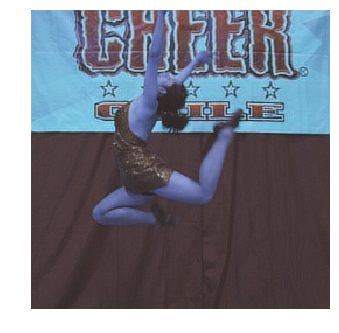

In [0]:
gan.g.load_weights('keras_files/checkpoints/generator0.hdf5')
im = gan.generate(testdata)
im = (im - np.min(im)) * 255 / (np.max(im) - np.min(im))
# im = im.reshape((1, 256, 256, 3))
# gan.d.predict(im)

im = Image.fromarray(im.astype('uint8'))
plt.figure()
plt.axis('off')
plt.imshow(im)
# plt.imshow(testdata[0])
# 

In [0]:
#@title train GAN
gan.train(photos, anime, fuzzy, test_image=testdata)

Train on 4320 samples, validate on 480 samples
Epoch 1/1
4320/4320 [==============================] - 95s 22ms/step - loss: 5.9046 - val_loss: 1.1921e-07
Train on 1440 samples, validate on 160 samples
Epoch 1/1
1440/1440 [==============================] - 225s 156ms/step - loss: 92.1034 - val_loss: 92.1034
